# Exercise 4

## Library

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

## Data preparation

In [4]:
csv_file_name = "advertising.csv"

In [5]:
def get_column(data, index):
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=True).tolist()
    
    tv_data = get_column(data, 0)
    radio_data = get_column(data, 1)
    newspaper_data = get_column(data, 2)
    sales_data = get_column(data, 3)
    
    X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
    y = sales_data
    
    return X, y
    

In [6]:
X, y = prepare_data(csv_file_name)

In [7]:
len(X), len(y)

(200, 200)

## Linear regression using BGD

In [8]:
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0, sigma=0.01)
    w2 = random.gauss(mu=0, sigma=0.01)
    w3 = random.gauss(mu=0, sigma=0.01)
    
    return [0, -0.01268850433497871 , 0.004752496982185252 , 0.0073796171538643845]
    # return (bias, w1, w2, w3)

In [9]:
def predict(X_features, weights):
    result = 0
    for x, w in zip(X_features, weights):
        result += x * w
    return result

def compute_loss(y_hat, y):
    return (y_hat - y) ** 2

def compute_gradient_w(X_features, y, y_hat):
    N = len(X_features)
    dl_dweights = []
    for i in range(N):
        dweight = 2 * X_features[i] * (y_hat - y)
        dl_dweights.append(dweight)
    return dl_dweights

def update_weights(weights, dl_dweights, lr):
    for i in range(len(weights)):
        weights[i] -= lr * dl_dweights[i]
    return weights

In [18]:
def implement_linear_regression(X_feature, y_output, epoch_max=50, lr=1e-5):
    losses = []
    weights = initialize_params()
    N = len(y_output)
    
    for epoch in range(epoch_max):
        total_loss = 0
        for i in range(N):
            features_i = X_feature[i]
            y = y_output[i]
            
            y_hat = predict(features_i, weights)
            
            loss = compute_loss(y, y_hat)
            total_loss += loss
            
            dl_dweights = compute_gradient_w(features_i, y, y_hat)
            
            weights = update_weights(weights, dl_dweights, lr)
            
            losses.append(loss)
        
        if ((epoch + 1) % 1000 == 0):
            print(f"Epoch: {epoch + 1}, Loss: {total_loss / N}")
        
    return weights, losses

In [26]:
X, y = prepare_data(csv_file_name)
W, L = implement_linear_regression(X, y, epoch_max=5000, lr=1e-5)

Epoch: 1000, Loss: 6.194930093625081
Epoch: 2000, Loss: 5.344875980962622
Epoch: 3000, Loss: 5.1496145494667225
Epoch: 4000, Loss: 5.127325188355508
Epoch: 5000, Loss: 5.141792463684308


In [27]:
def visualize_linear_regression(losses):
    plt.plot(losses[0:100])
    plt.xlabel("#iteration")
    plt.ylabel("Loss")
    plt.show()

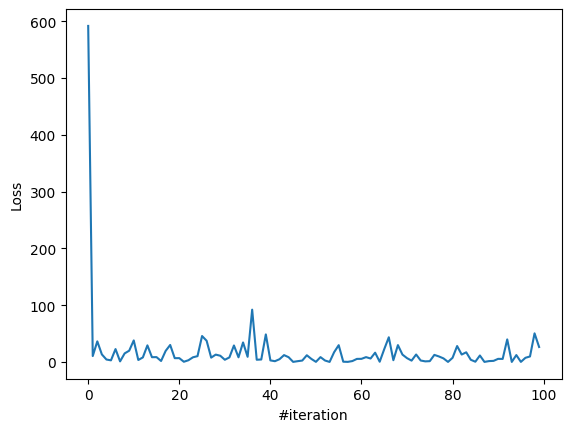

In [29]:
visualize_linear_regression(L)

In [30]:
print(L[9999])

31.339223408109948


Q12: a) 31.33